<a href="https://colab.research.google.com/github/leosandler/ML_ISU_Project_LeoSandler/blob/master/Linear_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello leo Welcome, instructions
1) Data Histogram
3) Exit
Your Input: 1
Enter (California Housing) or (Bill Verification)
The California data allows for you to model California housing price data from 1990 US Census.
The Bill Verification option allows for you to train a model fora data set including various bill characteristics.
Your Input: california housing
This takes one section of your data and turns it into a histogram. A histogram is useful for visuali.
1) Longitude
2) Latitude
3) Housing Median Age
4) Total Rooms
5) Total Bedrooms
6) Population
7) Households
8) Median Income
9) Median House Value
10) Exit

Your Input: 1
You selected a histogram for longitude.
Explain data and data nature. features


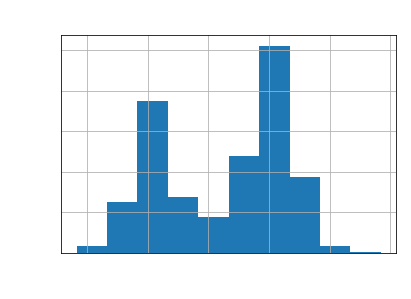

(Y/N) Do you want to download this plot: y
Enter in the file name: file
Hello leo Welcome, instructions
1) Data Histogram
3) Exit
Your Input: 3


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 432x288 with 0 Axes>

In [0]:
import sys
from __future__ import print_function
import math  # Simple math based operations are done through this import.(Outside of the built in ones like adding, etc.)
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt  # Matplotlib allows for data to be graphed within python.
from matplotlib import patches
import numpy as np  # Allows for more complex mathematics based operations.
from sklearn import metrics
import tensorflow as tf  
from tensorflow.python.data import Dataset
import pandas as pd  # Pandas is an import which allows for easy manipulation of data sets.
from google.colab import files  # Allowing File I/O within this online interpreter.


class Data:
  def __init__(self, name, url):
    self.name = name
    self.url = url
    self.pd_data = pd.read_csv(url, sep = ",")
    self.headers = list(self.pd_data.columns.values)
      
  
  def histo_options(self):
    cols = list(self.pd_data.columns.values)
    for x in range(len(cols)):
      cols[x] = cols[x].replace("_", " ").title()
      print(str(x + 1) + ") " + (cols[x]))
      if x == len(cols) - 1:
        print(str(x + 2) + ") Exit")
  
  
  def histogram(self):
    print("This takes one section of your data and turns it into a histogram. A histogram is useful for visuali.")
    self.histo_options()
    try:
      user_cat = int(input("\nYour Input: "))
      if 1 <= user_cat <= int(len(self.headers)):
        print("You selected a histogram for " + self.headers[user_cat - 1].replace("_", " ") + ".")
      elif user_cat == int(len(self.headers) + 1):
        self.histogram()
      else:
        print("Please enter a valid number.")
        self.histogram()
    except ValueError:
      print("Please enter a number, not a string.")
      self.histogram()
    if self.name == "Bill Verification":
      print("Explain data and data nature. features")
    elif self.name == "California Housing":
      print("Explain data and data nature. features")
    plt.subplot()
    self.pd_data[self.headers[user_cat - 1]].hist()
    plt.suptitle(self.name.title() + " Histogram", fontsize=20, color = "white")
    plt.tick_params(axis = "x", colors = "white")
    plt.tick_params(axis = "y", colors = "white")
    category = self.headers[user_cat - 1].replace("_", " ").title()
    plt.xlabel(category, fontsize=18, color = "white")
    plt.ylabel("Apearances in Data Set", fontsize=18, color = "white")
    plt.show()
    saving = input("(Y/N) Do you want to download this plot: ").title()
    if saving == "Y":
      filename = input("Enter in the file name: ")
      plt.savefig(filename, format = "png" ,transparent = True)

    
class User:
  def __init__(self, username):
    self.data_dict = {}
    self.csv_importing()
    self.username = username
    
  def menu(self):
    print("Hello " + str(self.username) + " Welcome, instructions")
    user_selection = int(input("1) Data Histogram\n3) Exit\nYour Input: "))
    if user_selection == 1:
      file_input = input("Enter (California Housing) or (Bill Verification)\nThe California data allows for you to model California "
                         "housing price data from 1990 US Census.\nThe Bill Verification option allows for you to train a model for"
                         "a data set including various bill characteristics.\nYour Input: ").title()
      try:
        self.data_dict[file_input].histogram()
      except KeyError:
        print("Enter one of the two file names.")
        self.menu()
    elif user_selection == 2:
      print("Do Something")
    elif user_selection == 3:
      sys.exit("Thanks for using Leo's machine learning companion.")
    self.menu()
  
  def csv_importing(self):
    class_instance = Data("California Housing", "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
    self.data_dict[class_instance.name] = class_instance
    class_instance_2 = Data("Bill Verification", "https://raw.githubusercontent.com/leosandler/ML_ISU_Project_LeoSandler/master/Bill_Verification.csv?token=AKUCQ3PFIKMCKN3U2PZEE4C4ZG3VK")
    self.data_dict[class_instance_2.name] = class_instance_2
    

class Model(Data):
  def __init__(self, model_name):
    super().__init__(self)  # SET UP SUPER INIT. INHERITANCE BASED ON DATA CLASS.
    self.model_name = model_name
  
  def text_file_download(self):
    files.download(str(self.filename) + ".txt")
    
hold = User("leo")
hold.menu()